# ECE3311 Project 3
## Team 6: Maya Flores, Selina Spry, Emma Williams

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from commpy.filters import rcosfilter, rrcosfilter
import scipy.signal
import scipy.interpolate

In [3]:
# Matlab's interp function
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = scipy.interpolate.interp1d(x, y, kind='cubic')

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

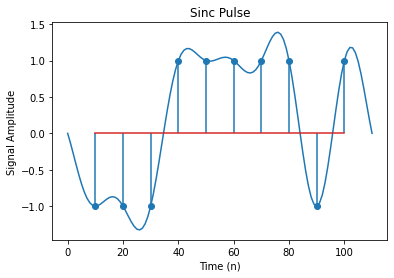

In [4]:
# Generate random polar data
d = 2*np.around(np.random.random((10,)))-1

# Define sinc pulse shape
ps_sinc = np.sinc(np.arange(-11,11,0.1))

# Create transmission using Sinc pulse shape

# Upsampling 
N = 10
d_upsample = np.zeros((N*N,))
d_upsample[::N] = d  #impulse train
sig_temp1 = np.convolve(d_upsample, ps_sinc)
sig1 = sig_temp1[100:211]

# Sanity check
plt.plot(sig1)
# plt.show()

# Sample the received waveform to 
# extract out of it the desired values
index = np.arange(10,110,10)
d_hat1 = sig1[index]
plt.stem(index,d_hat1)

plt.title('Sinc Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

## Question 1:
<br>Based on the sinc pulse shape example in Section 3, you are tasked with implementing a similar pulse shaping transmission system using the raised cosine pulse shape.Furthermore, you will need to demonstrate that it is possible to extract the original samplesfrom the recovered pulse shaped signal, similar to the plot shown in Figure 3.

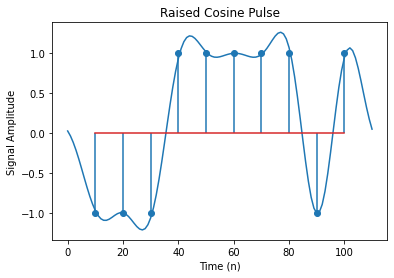

In [5]:
# Define raised cosine pulse shape (roll-off = 0.5)
ps_rcos = rcosfilter(61,0.5,1,10)

# Create transmission using rcos pulse shape

# Upsampling 
sig_temp2 = np.convolve(d_upsample, ps_rcos[1])
sig2 = sig_temp2[20:131]

# Sanity check
plt.plot(sig2)

plt.stem(index,d_hat1)

plt.title('Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()


## Question 2:
<br> Please demonstrate that only using the square-root raised cosine pulse shaping filter at the transmitter will not eliminate ISI when the received signal is sampled in order to recover the original data,i.e., produce the plot shown in Figure 4.

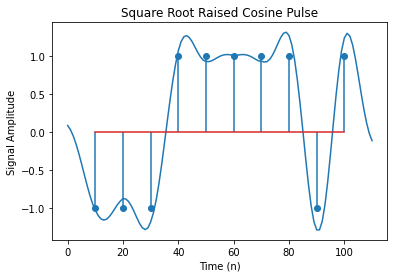

In [6]:
# Define square-root raised cosine pulse shape (roll-off = 0.5)
ps_srrcos = rrcosfilter(61,0.5,1,10)

# Create transmission using sqrt rcos pulse shape

# Upsampling 
sig_temp3 = np.convolve(d_upsample, ps_srrcos[1])
sig3 = sig_temp3[20:131]

# Sanity check
plt.plot(sig3)

plt.stem(index,d_hat1)

plt.title('Square Root Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()



## Question 3:
<br>Please demonstrate how two square-root raised cosine filters in series can yield recovered samples that do not suffer the impact of ISI

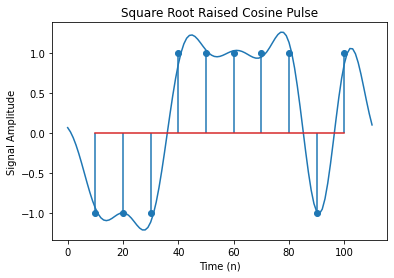

In [7]:
# Define square-root raised cosine pulse shape (roll-off = 0.5)
# ps_srrcos = rrcosfilter(61,0.5,1,10)

# Create transmission using sqrt rcos pulse shape

# Down sampling
# N = 10
# d_downsample = np.zeros((N*N,))
# d_downsample[::N] = d*(1/10)  #impulse train
# sig_temp = np.convolve(d_downsample, sig_temp)
# sig1 = sig_temp[100:211]

# Upsampling 
sig_temp4 = np.convolve(sig_temp3, ps_srrcos[1])/10
sig4 = sig_temp4[50:161]

# Sanity check
plt.plot(sig4)

plt.stem(index,d_hat1)

plt.title('Square Root Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()


## Question 4:
<br>Please demonstrate this same situation by replicating the impact of a non-ideal channel as shown in Figure 6.

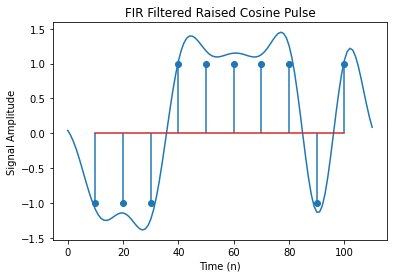

In [8]:
# Create a channel with some multipath propagation
h = [1,0.1,0.05,0.001]      # FIR filter

# Define raised cosine pulse shape (roll-off = 0.5)
ps_rcos = rcosfilter(61,0.5,1,10)

# Create transmission 

# Upsampling 
sig_temp5 = np.convolve(d_upsample, ps_rcos[1])
sig_temp6 = np.convolve(sig_temp5, h)
sig6 = sig_temp6[20:131]

# Sanity check
plt.plot(sig6)

plt.stem(index,d_hat1)

plt.title('FIR Filtered Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()


## Question 5:
<br>For this section, please obtain a filter that can mitigate the impact of h, and demonstrate its effectiveness using a plot similar to Figure 7. It is recommended to use a function such as scipy.signal.lfilter.

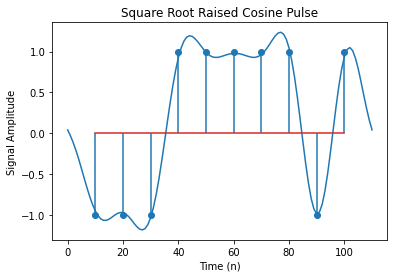

In [9]:
# Create a channel with some multipath propagation
# h = [1,0.1,0.05,0.001]      # FIR filter
h = [-1,0.1,0.05,0.001]      # FIR filter

# Create transmission 
sig7 = scipy.signal.lfilter(h,-1,sig6)

# Sanity check
plt.plot(sig7)
plt.stem(index,d_hat1)

plt.title('Square Root Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()



## Question 6:
<br>Please implement and demonstrate a PM waveform similar to the one shown in Figure 9

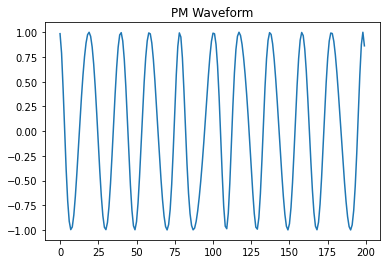

In [10]:
# Specify carrier frequency
w_c = 2*np.pi*5

# Generate a discrete version of a random continuous analog
# waveform using a Uniform Random Number Generator and
# an interpolation function to smooth out the result
L = 200  # Length of the overall transmission
M = 10   # Upsampling factor for generating analog waveform
analog_wavefm = interpolate_1d_vector((np.random.random((((int)(L/M)),))),M) 

# Generate AM waveform
n = np.arange(0,(((len(analog_wavefm)+1)/100)-0.01),0.01)
sig_am = (np.ones((len(analog_wavefm))) + analog_wavefm)*np.exp(1j*w_c*n).real
Dp = 1
sig_pm = (np.exp(1j*Dp*analog_wavefm)*np.exp(1j*w_c*n)).real

# Sanity check 
plt.title("PM Waveform")
plt.plot(sig_pm)
plt.show()

## Question 7:
<br> Please implement your own AM waveform envelope detector using a square law device.

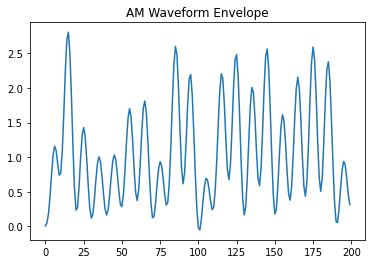

In [33]:
amwavesq = sig_am*sig_am

order = 4
samp_freq = 50
cutoff_freq = 5
norm_cutoff = 2*cutoff_freq/samp_freq

num, den = scipy.signal.butter(order, norm_cutoff)
filtered_sig = scipy.signal.lfilter(num, den, amwavesq)

plt.title("AM Waveform Envelope")
plt.plot(filtered_sig)
# plt.plot(amwavesq)
plt.show()

## Question 8:
<br> Please implement a product detector for recovering analog signals from PM waveforms.

In [ ]:
# multiply by cosine and filter with a LPF

## Question 9:
<br>Manually shift the first 5,000 samples plotted by 1.663 MHz such that it falls on the ideal 108 MHz carrier it was originally  transmitted on. Use the function plotfftIQ.pyavailable in Canvas to plot the result.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import math

#                x  -- input signal
#                fs -- sampling frequency [MHz] 
#                f0 -- center frequency [MHz]
#                n0 -- first sample (start time = n0/fs)
#                nf -- block size for transform (signal duration = nf/fs)
#                title_of_plot--title of plot (string) (optional)

## Import data from file 
data = np.fromfile("mystery_FM.dat",dtype="uint8")
x = data[0::2] + 1j*data[1::2]
def plot_FFT_IQ (x, n0, nf, fs, f0, title_of_plot=None):
	x_segment = x[n0:n0+nf]#-This extracts a segment of x starting at n0, of length nf, and plots the FFT.
	p = scipy.fftpack.fft(x_segment)
	z = 20*np.log10(np.abs(p)/np.max(np.abs(p)))
	Low_freq=(f0-fs/2) #lowest frequency to plot
	High_freq=(f0+fs/2); #highest frequency to plot
	N=len(z) 
	freq=(np.arange(0,N)*fs)/(N+Low_freq) #[0:1:N-1]*(fs)/N+Low_freq
	fig, ax = plt.subplots()
	if title_of_plot == None:
		ax.set_title('Spectrum Center Frequency = ' + str(f0))
	else:
		ax.set_title(title_of_plot+' Center Frequency = ' + str(f0))
	ax.set_ylabel('Relative amplitude [dB down from max]')
	ax.set_xlabel('Freqency [MHz]')
	ax.plot(freq,z)
	plt.show()

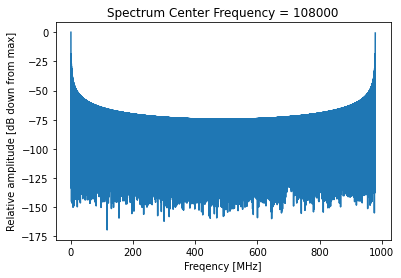

In [24]:
num_samples = 5000
f0 = 108000
sample_duration = 5
fs = num_samples/sample_duration
n0 = 1
nf = 5000000

# x*transpose
plot_FFT_IQ (x, n0, nf, fs, f0)
# plot_FFT_IQ(x,50000, 90000, 2000000, 91300000)

# num_samples = 5000
# sample_freq = 50000
# sample_duration = num_samples/sample_freq
# # print(sample_duration)

# time = np.linspace(0, sample_duration, 5000)
# # signal = np.cos(2*np.pi*1663000*time)

# x1 = []

# for i in range(5000):
#     x1.append(x[i] + 1663)
# print(len(x1))

# plot_FFT_IQ(x1,50000, 108000, 2000000, 91300000)

# plt.title("5000 samples")
# plt.plot(signal)
# plt.show()



## Question 10:
<br>To remove the side noise and begin lowering the sampling rate to the audio range, decimate the shifted signal by 8 and filter with a Hamming window. Plot your result.

## Question 11:
<br>Using the supplied FMIQDemod.pyfunction, demodulate the signal to baseband. Plot the resulting signal.

## Question 12:
<br>Using a Hamming window and a decimation factor 10, you should be able to listen what you have demodulated. Describe what you hear, and plot the final signal.